      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Missing values:
 price                              0
area                               0
bedrooms

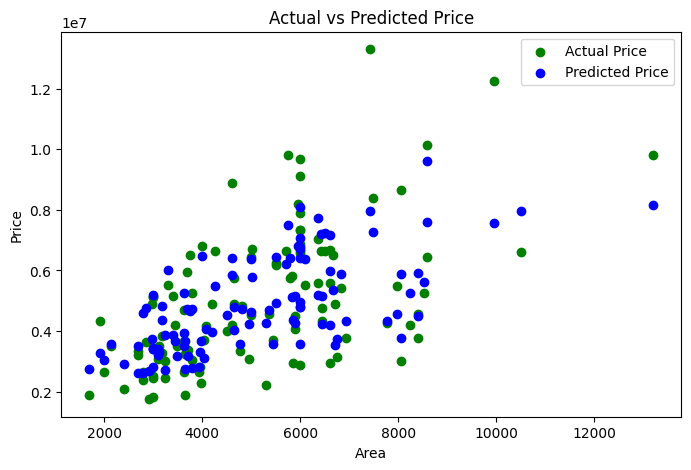

In [16]:
# Linear Regression Task - Housing Price Prediction

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the dataset
df = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv") 
print(df.head())
# 3. Preprocess the data
df = pd.get_dummies(df, drop_first=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# 4. Define features and target
X = df.drop('price', axis=1)
y = df['price']

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

# 9. Coefficients interpretation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coefficients)

# 10. Plotting
# Using area
if 'area' in df.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(X_test['area'], y_test, color='green', label='Actual Price')
    plt.scatter(X_test['area'], y_pred, color='blue', label='Predicted Price')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Price')
    plt.legend()
    plt.show()

In [14]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print("Folder:", dirname)
    for filename in filenames:
        print("   └──", filename)

Folder: /kaggle/input
Folder: /kaggle/input/housing-price-prediction
   └── Housing.csv


In [7]:
import os
print(os.listdir())

['.virtual_documents']
